In [79]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x
)


In [80]:
df_US=df[df['job_country']=='United States']

In [81]:
df_skills=df_US.explode('job_skills')

In [82]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count=df_skills_count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [83]:
df_job_title_short=df_US['job_title_short'].value_counts().reset_index(name='job_total')
df_job_title_short

,job_title_short,job_total
0,Data Analyst,67816
1,Data Scientist,58830
2,Data Engineer,35080
3,Senior Data Scientist,12946
4,Senior Data Analyst,11791
5,Senior Data Engineer,9289
6,Business Analyst,7382
7,Software Engineer,1814
8,Machine Learning Engineer,921
9,Cloud Engineer,423


In [84]:
df_skill_perc=pd.merge(df_skills_count,df_job_title_short,how='left',on='job_title_short')
df_skill_perc['skill_percent']=100*df_skill_perc['skill_count']/df_skill_perc['job_total']
df_skill_perc

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


In [85]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

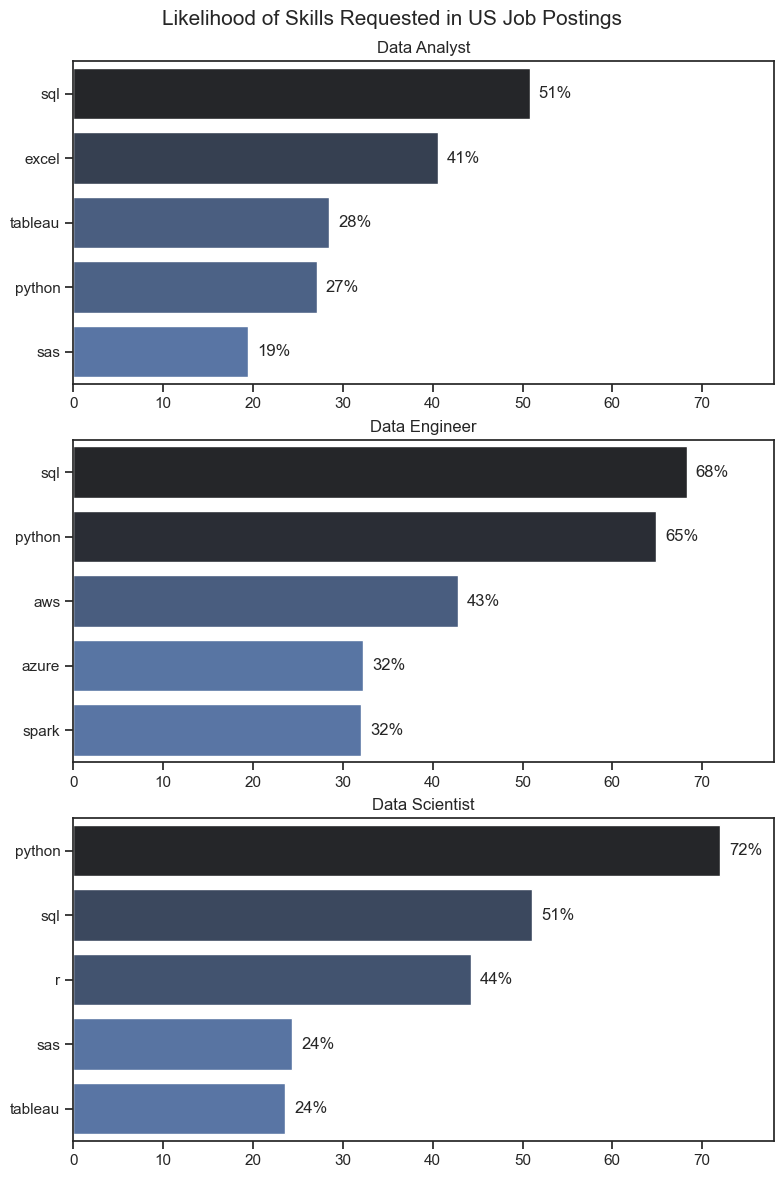

In [86]:

fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, 12))

for i, job_title in enumerate(job_titles):
    df_plot = (
        df_skill_perc[df_skill_perc["job_title_short"] == job_title]
        .head(5)
    )

    sns.barplot(
        data=df_plot,
        x="skill_percent",
        y="job_skills",
        ax=ax[i],
        hue="skill_count",
        palette="dark:b_r"
    )

    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")

    # ax[i].set_xticks([])

fig.suptitle(
    "Likelihood of Skills Requested in US Job Postings",
    fontsize=15
)
fig.tight_layout(h_pad=0.5)
plt.show()


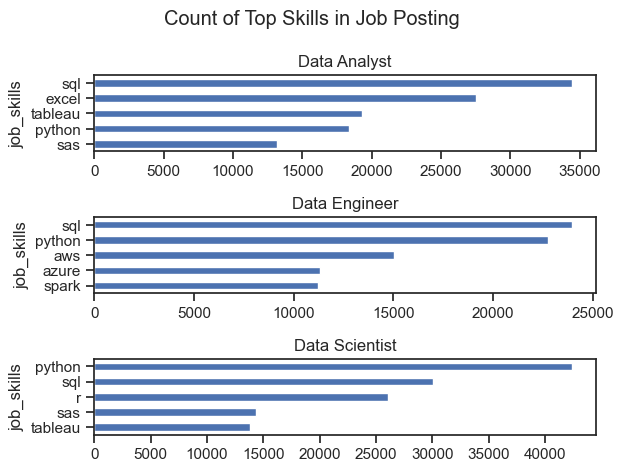

In [87]:
from matplotlib import legend


fig,ax =plt.subplots(len(job_titles),1)
for i,job_title in enumerate(job_titles):
    df_plot=df_skills_count[df_skills_count['job_title_short']==job_title].head(5)
    df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title,legend=False)
    ax[i].invert_yaxis()
    
fig.suptitle("Count of Top Skills in Job Posting")
plt.tight_layout()